## Motivation

Every two years, every member of the United States House of Representatives is up for election. After being elected, members of the House are given a set budget from the legislature itself to hire staff, buy office equipment, and defray other costs of legislating and addressing constituent concerns. While each office gets the same amount of money from Congress to spend on these purposes, congressional offices have discretion over how that allowance is actually spent, and we would like to see whether some spending patterns are associated with higher political success. 

# Getting/Formatting the Data

For this project, we decided to use the [House Office Expenditure Data](https://www.propublica.org/datastore/dataset/house-office-expenditures) from ProPublica as it contains well formatted data about house expenditures from 2009 to 2018. The main downside of this dataset is that it is missing data from the most recent midterm election, but we still have almost 10 years of data to work with.

To programatically access the datasets we are working with, we have included copies here [repository](https://github.com/AndrewTrackim/cmsc320-final/raw/master/house-expenditure/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# just finna test with one of the files to see what happens
frames = []

# automate the dataframes from 2010 to 2020
for i in range(2010, 2021):
    for j in range(1, 5):
        df = pd.read_csv('./house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',', encoding = 'unicode_escape')
        df.dropna(subset = ['BIOGUIDE_ID'], inplace=True)
        if not {'CATEGORY'}.issubset(df.columns): # For whatever reason, 2018Q2 has its category column mislabeled. 
            df.rename(columns={"SORT SUBTOTAL DESCRIPTION" : "CATEGORY"}, inplace=True)
        df["QUARTER"] = str(i) + 'Q' + str(j)
        frames.append(df)

# for 2021, we need to handle the data separately because we only have 3 quarters of disclosures
for j in range(1, 4):
    df = pd.read_csv('./house-expenditure/2021Q' + str(j) +'-house-disburse-detail.csv', thousands=',', encoding = 'unicode_escape')
    df.dropna(subset = ['BIOGUIDE_ID'], inplace=True)
    if not {'CATEGORY'}.issubset(df.columns): # For whatever reason, 2018Q2 has its category column mislabeled. 
        df.rename(columns={"SORT SUBTOTAL DESCRIPTION" : "CATEGORY"}, inplace=True)
    df["QUARTER"] = str(i) + 'Q' + str(j)
    frames.append(df)

house_data = pd.concat(frames)
house_data

<ipython-input-1-5e3f2e998550>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',', encoding = 'unicode_escape')
<ipython-input-1-5e3f2e998550>:9: DtypeWarning: Columns (2,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',', encoding = 'unicode_escape')
<ipython-input-1-5e3f2e998550>:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',', encoding = 'unicode_escape')


,BIOGUIDE_ID,OFFICE,QUARTER,CATEGORY,DATE,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,...,TRANSCODELONG,RECORDID,RECIP (orig.),PROGRAM,SORT SEQUENCE,AMOUNT,TRANSACTION DATE,DATA SOURCE,DOCUMENT,id
7597,A000014,HON. NEIL ABERCROMBIE,2010Q1,FRANKED MAIL,NaN,02Â­22 O4 NW201000101 UNITED STATES P...,01/03/10,01/31/10,FRANKED MAIL,126.58,...,NaN,NaN,02Â­22 O4 NW201000101 UNITED STATES P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7598,A000014,HON. NEIL ABERCROMBIE,2010Q1,FRANKED MAIL,NaN,03Â­25 O4 NW201000200 UNITED STATES P...,02/01/10,02/28/10,FRANKED MAIL,1112.16,...,NaN,NaN,03Â­25 O4 NW201000200 UNITED STATES P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7599,A000014,HON. NEIL ABERCROMBIE,2010Q1,PERSONNEL COMPENSATION,NaN,"ADAMS,LEE-ANN E",01/03/10,03/31/10,MILITARY LIAISON,21266.67,...,NaN,NaN,"ADAMS,LEE-ANN E",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7600,A000014,HON. NEIL ABERCROMBIE,2010Q1,PERSONNEL COMPENSATION,NaN,"ASSELBAYE, AMY",01/03/10,02/28/10,CHIEF OF STAFF,21750.00,...,NaN,NaN,"ASSELBAYE, AMY",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7601,A000014,HON. NEIL ABERCROMBIE,2010Q1,PERSONNEL COMPENSATION,NaN,"CHAN,GLORIA S",02/01/10,02/28/10,SHARED EMPLOYEE,4500.00,...,NaN,NaN,"CHAN,GLORIA S",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92425,Z000017,2021 HON. LEE M. ZELDIN,2020Q3,EQUIPMENT,,,,,OFFICE TOTALS:,317215.95,...,NaN,,NaN,OFFICIAL EXPENSES OF MEMBERS,GRAND TOTAL FOR ORGANIZATION,NaN,NaN,NaN,NaN,NaN
92426,Z000017,2021 HON. LEE M. ZELDIN,2020Q3,PERSONNEL COMPENSATION,,MCMAHON JORDANA A.,2021-07-01,2021-07-14,DISTRICT OFFICE PAID INTERN -,777.78,...,NaN,,NaN,INTERN ALLOWANCES,DETAIL,NaN,NaN,NaN,NaN,NaN
92427,Z000017,2021 HON. LEE M. ZELDIN,2020Q3,PERSONNEL COMPENSATION,,,,,PERSONNEL COMPENSATION TOTALS:,777.78,...,NaN,,NaN,INTERN ALLOWANCES,SUBTOTAL,NaN,NaN,NaN,NaN,NaN
92428,Z000017,2021 HON. LEE M. ZELDIN,2020Q3,PERSONNEL COMPENSATION,,,,,INTERN ALLOWANCES TOTALS:,777.78,...,NaN,,NaN,INTERN ALLOWANCES,SUBTOTAL,NaN,NaN,NaN,NaN,NaN


[election data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/IG0UN2)

In [2]:
election_data = pd.read_csv('./house-expenditure/1976-2020-house.csv')

# filter out the years before 2009 and after 2018
election_data = election_data[election_data['year'] >= 2009]
election_data = election_data[election_data['year'] <= 2020]

election_data

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
22553,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,False,DAVID WALTER,CONSTITUTION,False,TOTAL,26357,156281,False,20220331,False
22554,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,False,JO BONNER,REPUBLICAN,False,TOTAL,129063,156281,False,20220331,False
22555,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,False,WRITEIN,NaN,True,TOTAL,861,156281,False,20220331,False
22556,2010,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,NaN,False,BOBBY BRIGHT,DEMOCRAT,False,TOTAL,106865,219028,False,20220331,False
22557,2010,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,NaN,False,MARTHA ROBY,REPUBLICAN,False,TOTAL,111645,219028,False,20220331,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31098,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,False,LYNNETTE GREY BULL,DEMOCRAT,False,TOTAL,66576,278503,False,20220331,False
31099,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,False,OVERVOTES,NaN,False,TOTAL,1274,278503,False,20220331,False
31100,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,False,RICHARD BRUBAKER,LIBERTARIAN,False,TOTAL,10154,278503,False,20220331,False
31101,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,False,UNDERVOTES,NaN,False,TOTAL,6337,278503,False,20220331,False


Try to figure out what categories we are working with and how these categories should be group into broader categories

In [3]:
from collections import defaultdict
categories = defaultdict(lambda: 0)
def add_set(row):
      categories[row['CATEGORY']] += 1

#apply add_set to the house_data
house_data.apply(add_set, axis = 1)
categories

defaultdict(<function __main__.<lambda>()>,
            {'FRANKED MAIL': 128370,
             'PERSONNEL COMPENSATION': 539204,
             'TRAVEL': 928273,
             'RENT, COMMUNICATION, UTILITIES': 598709,
             'PRINTING AND REPRODUCTION': 174619,
             'OTHER SERVICES': 211271,
             'SUPPLIES AND MATERIALS': 749782,
             'EQUIPMENT': 144454,
             'PERSONNEL BENEFITS': 122,
             'TRANSPORTATION OF THINGS': 754,
             'RENT COMMUNICATION UTILITIES': 18459,
             'RENT  COMMUNICATION  UTILITIES': 354294,
             'BENEFITS TO FORMER PERSONNEL': 5})

In [4]:
replace = {
    'RENT  COMMUNICATION  UTILITIES': 'RENT, COMMUNICATION, UTILITIES',
    'RENT COMMUNICATION UTILITIES': 'RENT, COMMUNICATION, UTILITIES'
}
house_data.replace(to_replace=replace, value=None, inplace=True)

In [5]:
categories = defaultdict(lambda: 0)
def add_set(row):
      categories[row['CATEGORY']] += 1
      
house_data.apply(add_set, axis = 1)
str(categories)

"defaultdict(<function <lambda> at 0x7fc2307a7820>, {'FRANKED MAIL': 128370, 'PERSONNEL COMPENSATION': 539204, 'TRAVEL': 928273, 'RENT, COMMUNICATION, UTILITIES': 598709, 'PRINTING AND REPRODUCTION': 174619, 'OTHER SERVICES': 211271, 'SUPPLIES AND MATERIALS': 749782, 'EQUIPMENT': 144454, 'PERSONNEL BENEFITS': 122, 'TRANSPORTATION OF THINGS': 754, 'RENT COMMUNICATION UTILITIES': 18459, 'RENT  COMMUNICATION  UTILITIES': 354294, 'BENEFITS TO FORMER PERSONNEL': 5})"

In [6]:
import requests
from bs4 import BeautifulSoup
raw = requests.get("https://www.congress.gov/help/field-values/member-bioguide-ids")
soup = BeautifulSoup(raw.text, 'lxml')
table = soup.find('table')

# Since the entire thing is a formatted table, read it directly into a pandas dataframe
tabledf = pd.read_html(str(table))
tabledf = tabledf[0]
tabledf.dropna(subset = ['Member'], inplace=True)
tabledf.reset_index(drop=True, inplace=True)
members = tabledf['Member'].str.extractall("(.*), (.*) \((.*) - (.*)\)")

members.reset_index(drop=True, inplace=True)
members.rename(columns={0 : 'LASTNAME', 1: "FIRSTNAME", 2: "PARTY", 3: "STATE"}, inplace=True)
members['BIOGUIDE_ID'] = tabledf['Member ID']
members

,LASTNAME,FIRSTNAME,PARTY,STATE,BIOGUIDE_ID
0,Abdnor,James,Republican,South Dakota,A000009
1,Abercrombie,Neil,Democratic,Hawaii,A000014
2,Abourezk,James,Democratic,South Dakota,A000017
3,Abraham,Ralph Lee,Republican,Louisiana,A000374
4,Abraham,Spencer,Republican,Michigan,A000355
...,...,...,...,...,...
2422,Zinke,Ryan K.,Republican,Montana,Z000018
2423,Zion,Roger H.,Republican,Indiana,Z000010
2424,Zorinsky,Edward,Democratic,Nebraska,Z000013
2425,Zschau,Edwin V. W.,Republican,California,Z000014


Here we are importing data on the number of terms each congress member has served, we are being carfull to not count terms served after the period we are analysing.

In [7]:
import datetime

term_data = []
column_names = ['BIOGUIDE_ID','TERMS']

for url in ['https://theunitedstates.io/congress-legislators/legislators-current.json','https://theunitedstates.io/congress-legislators/legislators-historical.json']:
    r = requests.get(url)
    json_data = r.json()

    for json_el in json_data:
        number_of_terms = 0
        for term in json_el['terms']:
            start_date = datetime.datetime.strptime(term['start'], '%Y-%m-%d')
            # Make sure we are not looking at terms served after the period we are analysing
            if start_date.year < 2020:
                number_of_terms += 1
        term_data.append([json_el['id']['bioguide'], len(json_el['terms'])])

us_io_data = pd.DataFrame(term_data, columns=column_names)
us_io_data

,BIOGUIDE_ID,TERMS
0,B000944,10
1,C000127,5
2,C000141,13
3,C000174,9
4,C001070,3
...,...,...
12585,H001088,2
12586,Y000033,25
12587,F000449,9
12588,V000132,5


## k-means

In [8]:
import numpy as np
quarters = house_data['QUARTER'].unique()
categories = house_data['CATEGORY'].unique()

quarter = quarters[4]
hd_by_quarter = house_data[house_data['QUARTER'] == quarter]
bio_ids = hd_by_quarter['BIOGUIDE_ID'].unique()


spending_per_candidate = hd_by_quarter.groupby(['BIOGUIDE_ID','CATEGORY'])['AMOUNT'].sum()
spending_data = []
for bio_id in bio_ids:
    row = [bio_id]
    for category in categories:
        if category in spending_per_candidate[bio_id]:
            row.append(spending_per_candidate[bio_id][category])
        else:
            row.append(0)
    spending_data.append(row)
quarter_spending_df = pd.DataFrame(spending_data,columns = ["BIOGUIDE_ID"] + categories.tolist())
# quarter_spending_df = quarter_spending_df.dropna(axis='columns')
# quarter_spending_df.dropna(subset = ['BIOGUIDE_ID']))
quarter_spending_df
# spending_per_candidate.to_csv('spending_per_candidate_' + quarter + '.csv')

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL
0,A000014,0.00,-16.67,0.00,0.00,0.00,0.00,0.00,0.00,0,0.0,0,0,0
1,A000022,1909.79,221917.86,4408.29,42452.47,3351.43,14544.05,16893.16,29771.60,0,0.0,0,0,0
2,A000366,544.03,153141.65,5278.86,11755.74,3088.08,16290.80,3718.37,1154.26,0,0.0,0,0,0
3,A000055,1596.30,241025.00,10240.27,20557.94,2207.96,31803.95,10611.37,466.50,0,0.0,0,0,0
4,A000364,-1025.59,63958.87,2752.45,1535.46,0.00,75.00,118.85,2500.00,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Y000062,1516.09,251042.50,16880.90,19938.93,3095.85,9820.06,16012.77,1585.11,0,0.0,0,0,0
536,Y000063,915.11,138985.01,9307.80,11831.87,2140.50,9601.80,17129.45,1925.10,0,0.0,0,0,0
537,Y000031,9060.30,225343.06,13973.82,22532.63,2197.04,13195.70,21175.40,8000.64,0,0.0,0,0,0
538,Y000033,1291.25,254234.48,14910.34,53791.82,2991.34,36233.64,27649.41,12792.63,0,0.0,0,0,0


In [9]:
# Left join the spending data with the candidate data
spending_member_info = quarter_spending_df.merge(members, on="BIOGUIDE_ID")
spending_member_info = spending_member_info.merge(us_io_data, on="BIOGUIDE_ID")
spending_member_info

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,LASTNAME,FIRSTNAME,PARTY,STATE,TERMS
0,A000014,0.00,-16.67,0.00,0.00,0.00,0.00,0.00,0.00,0,0.0,0,0,0,Abercrombie,Neil,Democratic,Hawaii,11
1,A000022,1909.79,221917.86,4408.29,42452.47,3351.43,14544.05,16893.16,29771.60,0,0.0,0,0,0,Ackerman,Gary L.,Democratic,New York,15
2,A000366,544.03,153141.65,5278.86,11755.74,3088.08,16290.80,3718.37,1154.26,0,0.0,0,0,0,Adams,Sandy,Republican,Florida,1
3,A000055,1596.30,241025.00,10240.27,20557.94,2207.96,31803.95,10611.37,466.50,0,0.0,0,0,0,Aderholt,Robert B.,Republican,Alabama,13
4,A000364,-1025.59,63958.87,2752.45,1535.46,0.00,75.00,118.85,2500.00,0,0.0,0,0,0,Adler,John H.,Democratic,New Jersey,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Y000062,1516.09,251042.50,16880.90,19938.93,3095.85,9820.06,16012.77,1585.11,0,0.0,0,0,0,Yarmuth,John A.,Democratic,Kentucky,8
536,Y000063,915.11,138985.01,9307.80,11831.87,2140.50,9601.80,17129.45,1925.10,0,0.0,0,0,0,Yoder,Kevin,Republican,Kansas,4
537,Y000031,9060.30,225343.06,13973.82,22532.63,2197.04,13195.70,21175.40,8000.64,0,0.0,0,0,0,Young,C. W. Bill,Republican,Florida,22
538,Y000033,1291.25,254234.48,14910.34,53791.82,2991.34,36233.64,27649.41,12792.63,0,0.0,0,0,0,Young,Don,Republican,Alaska,25


In [10]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
# train, test = train_test_split(spending_member_info[categories], test_size=0.2)
kmeans_model = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
kmeans_trained = kmeans_model.fit(spending_member_info[categories])
# kmeans_trained.cluster_centers_

clusters = kmeans_trained.predict(spending_member_info[categories])
for i in list(set(clusters)):
# i=0
    print("Cluster:",i)
    print(spending_member_info[["STATE","BIOGUIDE_ID","LASTNAME","TERMS"]][clusters==i].to_string())
    print("")
# print(spending_member_info[["PARTY","STATE"]][clusters==i].groupby("STATE").count())

Cluster: 0
              STATE BIOGUIDE_ID         LASTNAME  TERMS
4        New Jersey     A000364            Adler      1
30         Arkansas     B000420            Berry      7
49         Virginia     B000657          Boucher     14
73        Louisiana     C001079              Cao      1
121       Tennessee     D000599            Davis      4
126   Massachusetts     D000210         Delahunt      7
188       Tennessee     G000309           Gordon     13
194         Florida     G000556          Grayson      3
199         Alabama     G000557         Griffith      1
224    South Dakota     H001037  Herseth Sandlin      4
231   New Hampshire     H001043            Hodes      2
242  South Carolina     I000023           Inglis      6
331        New York     M001174          McMahon      1
337       Louisiana     M001161         Melancon      3
345           Idaho     M001175          Minnick      1
348          Kansas     M001140            Moore      6
354    Pennsylvania     M001168      

In [11]:
print(spending_member_info[["PARTY","LASTNAME","STATE"]][clusters==6].to_string())

          PARTY LASTNAME    STATE
421  Republican   Rogers  Alabama


In [12]:
len(spending_member_info[["PARTY","LASTNAME"]][clusters==1])

161

## K-NN

In [13]:
import numpy as np
quarters = house_data['QUARTER'].unique()
categories = house_data['CATEGORY'].unique()
spending_data = []

for quarter in quarters:
    hd_by_quarter = house_data[house_data['QUARTER'] == quarter]
    bio_ids = hd_by_quarter['BIOGUIDE_ID'].unique()

    spending_per_candidate = hd_by_quarter.groupby(['BIOGUIDE_ID','CATEGORY'])['AMOUNT'].sum()
        
    for bio_id in bio_ids:
        row = [bio_id]
        for category in categories:
            if category in spending_per_candidate[bio_id]:
                row.append(spending_per_candidate[bio_id][category])
            else:
                row.append(0)
        spending_data.append(row)
quarter_spending_df = pd.DataFrame(spending_data,columns = ["BIOGUIDE_ID"] + categories.tolist())
# quarter_spending_df = quarter_spending_df.dropna(axis='columns')
# quarter_spending_df.dropna(subset = ['BIOGUIDE_ID']))
quarter_spending_df
# spending_per_candidate.to_csv('spending_per_candidate_' + quarter + '.csv')

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL
0,A000014,1498.61,259540.31,10891.59,21084.39,43.90,8348.02,4661.75,981.30,0.0,0.0,0.0,0.00,0.0
1,A000022,21011.90,242972.84,3655.22,33422.01,9794.18,21341.00,17776.34,2033.33,0.0,0.0,0.0,0.00,0.0
2,A000055,1671.92,264937.16,10360.45,19145.14,2130.92,11644.95,8005.85,601.50,0.0,0.0,0.0,0.00,0.0
3,A000364,85906.29,199660.40,7925.65,27119.41,75410.20,30479.70,6095.27,3894.33,0.0,0.0,0.0,0.00,0.0
4,A000358,40746.81,259704.20,6721.87,24703.34,45627.10,12367.41,6997.48,3610.12,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20715,W000827,-48.90,343750.00,3554.82,0.00,612.92,20806.60,330.84,385771.82,0.0,0.0,0.0,63428.86,0.0
20716,Y000062,279.42,554398.70,3576.12,0.00,38.00,6924.42,30705.18,568213.36,0.0,0.0,0.0,112862.60,0.0
20717,Y000065,740.14,702125.06,4916.98,0.00,800.00,3151.28,4912.34,822292.96,0.0,0.0,0.0,37383.60,0.0
20718,Y000033,105.16,764444.52,55760.86,0.00,79.90,37800.00,3949.54,915982.56,0.0,0.0,0.0,42935.26,0.0


In [14]:
# Left join the spending data with the candidate data
spending_member_info = quarter_spending_df.merge(members, on="BIOGUIDE_ID")
spending_member_info = spending_member_info.merge(us_io_data, on="BIOGUIDE_ID")
spending_member_info

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,LASTNAME,FIRSTNAME,PARTY,STATE,TERMS
0,A000014,1498.61,259540.31,10891.59,21084.39,43.90,8348.02,4661.75,981.30,0.0,0.0,0.0,0.00,0.0,Abercrombie,Neil,Democratic,Hawaii,11
1,A000014,768.37,140136.13,5114.78,18945.34,124.82,10946.92,3398.35,580.34,0.0,0.0,0.0,0.00,0.0,Abercrombie,Neil,Democratic,Hawaii,11
2,A000014,0.00,0.00,0.00,0.00,640.45,2496.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,Abercrombie,Neil,Democratic,Hawaii,11
3,A000014,0.00,-16.67,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,Abercrombie,Neil,Democratic,Hawaii,11
4,A000014,0.00,0.00,-5.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,Abercrombie,Neil,Democratic,Hawaii,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20683,C001125,0.00,155414.44,1563.60,0.00,2192.00,0.00,171482.84,0.00,0.0,0.0,0.0,13226.04,0.0,Carter,Troy,Democratic,Louisiana,1
20684,C001125,0.00,379131.84,15761.42,0.00,8093.20,13214.00,19398.20,483877.74,0.0,0.0,0.0,56699.08,0.0,Carter,Troy,Democratic,Louisiana,1
20685,S001218,-68.80,75604.46,0.00,0.00,0.00,0.00,91.08,76826.74,0.0,0.0,0.0,0.00,0.0,Stansbury,Melanie Ann,Democratic,New Mexico,1
20686,S001218,-67.20,473358.86,34436.78,0.00,4928.36,9490.72,8084.16,538200.82,0.0,0.0,0.0,12471.30,0.0,Stansbury,Melanie Ann,Democratic,New Mexico,1


### K-nn - Predicting party

Issolate just Democratic and Republican members as the other parties don't have enough data to train on.

In [15]:
spending_member_info_2_party_dup_mems = pd.concat([spending_member_info[spending_member_info["PARTY"] == 'Republican'], spending_member_info[spending_member_info["PARTY"] == 'Democratic']])
spending_member_info_2_party_dup_mems["PARTY"].unique()

array(['Republican', 'Democratic'], dtype=object)

In [16]:
spending_member_info_2_party = spending_member_info_2_party_dup_mems.groupby("BIOGUIDE_ID").mean()
spending_member_info_2_party = spending_member_info_2_party.merge(members, on="BIOGUIDE_ID")
spending_member_info_2_party

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,TERMS,LASTNAME,FIRSTNAME,PARTY,STATE
0,A000014,453.396000,79931.954000,3200.274000,8005.946000,161.834000,4358.188000,1612.020000,312.328000,0.0,0.000000,0.000000,0.000000,0.0,11.0,Abercrombie,Neil,Democratic,Hawaii
1,A000022,7788.006667,193373.456667,3442.826000,25562.300667,4367.879333,11344.972667,10127.956667,3913.299333,0.0,62.866667,0.000000,0.000000,0.0,15.0,Ackerman,Gary L.,Democratic,New York
2,A000055,2926.609048,367439.927381,26476.261905,13332.801667,3601.123571,13085.263571,17281.933810,263880.248333,0.0,0.000000,571.451905,18993.231190,0.0,13.0,Aderholt,Robert B.,Republican,Alabama
3,A000148,159.340000,450340.613333,10595.273333,0.000000,6249.540000,14976.660000,16235.866667,549740.266667,0.0,0.000000,0.000000,72318.253333,0.0,1.0,Auchincloss,Jake,Democratic,Massachusetts
4,A000210,10945.465714,178926.020952,3494.050476,26119.840476,6882.656667,12245.477143,5025.150000,5005.634762,0.0,0.000000,0.000000,0.000000,0.0,13.0,Andrews,Robert E.,Democratic,New Jersey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,Y000064,13135.199600,209062.036000,14528.366400,16534.750000,17906.093200,11071.945200,5417.384800,1834.870800,0.0,0.000000,720.305200,50.960400,0.0,4.0,Young,Todd,Republican,Indiana
927,Y000065,4120.238438,300707.860938,17538.361250,8825.123750,7192.835938,14217.881875,12983.630000,244929.378750,0.0,0.000000,484.918125,19558.886562,0.0,4.0,Yoho,Ted S.,Republican,Florida
928,Y000066,11272.579444,236393.313333,16917.312222,10016.435556,8820.207778,12847.712222,12529.895556,175452.861667,0.0,0.388889,947.271667,17889.126111,0.0,2.0,Young,David,Republican,Iowa
929,Z000017,23774.776250,428209.460000,15033.166667,7506.778333,21338.715000,22485.333750,14348.271250,453912.799583,0.0,106.994583,1232.522500,41940.898333,0.0,4.0,Zeldin,Lee M.,Republican,New York


Here we are making a KNN with default values to see if the model does better than random chance.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(spending_member_info_2_party[categories], spending_member_info_2_party["PARTY"])
knn_model = KNeighborsClassifier()
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

0.6433333333333333

We get an accurary score higher than 50% which looks promising.

We can now try to tune the hyperparameters. Starting with the way points in the k-nn model are weighted. Uniform weighting gives all k nearest points equal weighting, while the distance weighting weighs points by the inverse of their distance. The default weight in scikit learn is uniform so we are testing the distance weighting method.

In [18]:
knn_model = KNeighborsClassifier(weights='distance')
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

0.6419254658385093

It looks like both weighting methods produce very similar accuracies. As a result, we will use the default that scikit learn uses as there is likely good reason it is the default and we do not have a good reason to change it.

Next we are going to look at the number of nearest neighbors and see how that changes our accuracy.

<ipython-input-19-6ea273826c0b>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


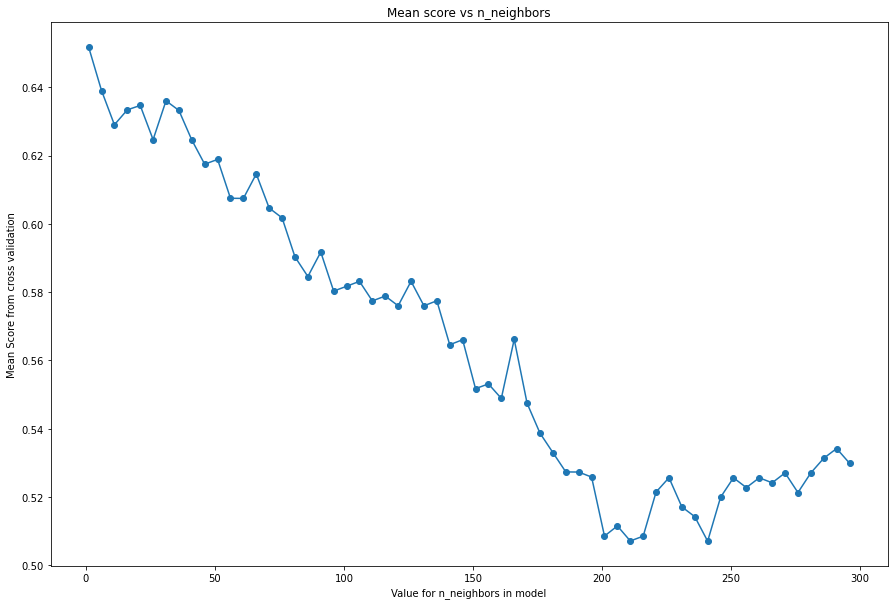

In [19]:
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier()
test_k = range(1,300+1,5)
params=[{
    'n_neighbors': test_k,
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()

# Code to change default plot size:
plt.rcParams['figure.figsize'] = [15, 10]

fig, ax = plt.subplots()
ax.plot(test_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()

From the graph it seems like the ideal number of neighbors is in the range between 10 and 50. We can do a grid search of all values in that range to better visualize the space.

<ipython-input-20-be3a5a5042be>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


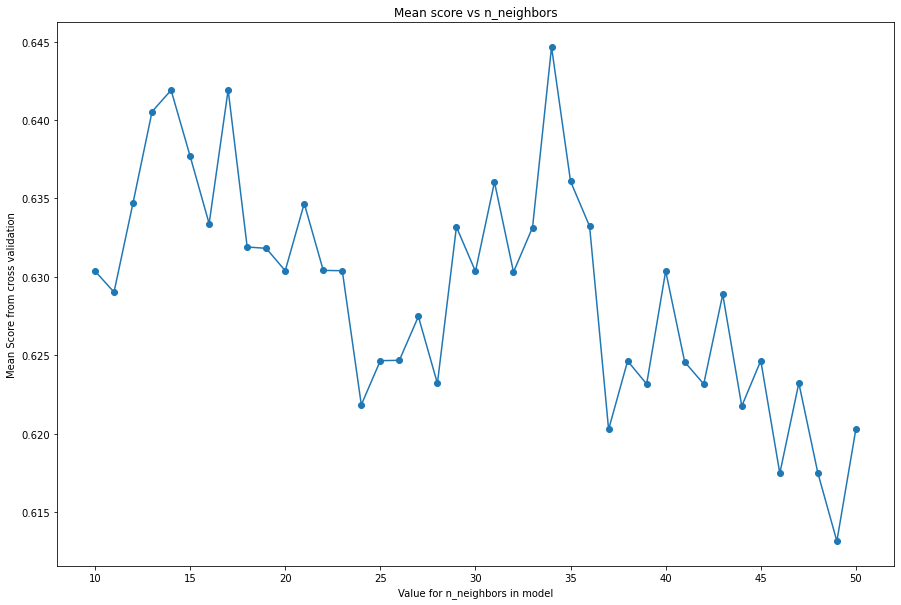

In [20]:
knn_model = KNeighborsClassifier()
test_k = range(10,50+1)
params=[{
    'n_neighbors': test_k,
    # 'weights': ['uniform', 'distance']
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()
tested_k = gs_knn.cv_results_['param_n_neighbors'].tolist()

fig, ax = plt.subplots()
ax.plot(tested_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()


In [21]:
max_score = max(result_k)
index_of_max = result_k.index(max_score)
optimal_k_val = tested_k[index_of_max]
optimal_k_val

34

There seems to be a peak in the data around $k=25$ so that will be the value for k we will use in the final model.

With these hyper parameters set, we can evaulate our model's performance on the test set.

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k_val)
knn_trained = knn_model.fit(x_train, y_train)
knn_model.score(x_test,y_test)

0.6180257510729614

### K-nn - Predicting State

In [23]:
# Verifying we have enough data for each state

# state_count = {}
# for state in spending_member_info["STATE"].unique():
#     state_count[state] = sum(sum([spending_member_info["STATE"] == state]))
# state_count

We have a lot more data for states with more representitives

In [24]:
x_train, x_test, y_train, y_test = train_test_split(spending_member_info_2_party[categories],spending_member_info_2_party["STATE"])
knn_model = KNeighborsClassifier()
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

/home/arjun/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.06592132505175982

We get an accurary score higher than 1/56 which looks promising.

We can now try to tune the hyperparameters. Starting with the way points in the k-nn model are weighted. Uniform weighting gives all k nearest points equal weighting, while the distance weighting weighs points by the inverse of their distance. The default weight in scikit learn is uniform so we are testing the distance weighting method.

In [25]:
knn_model = KNeighborsClassifier(weights='distance')
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

/home/arjun/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.06732919254658384

It looks like both weighting methods produce very similar accuracies. As a result, we will use the default that scikit learn uses as there is likely good reason it is the default and we do not have a good reason to change it.

Next we are going to look at the number of nearest neighbors and see how that changes our accuracy.

/home/arjun/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
<ipython-input-26-210daaf7f6d5>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


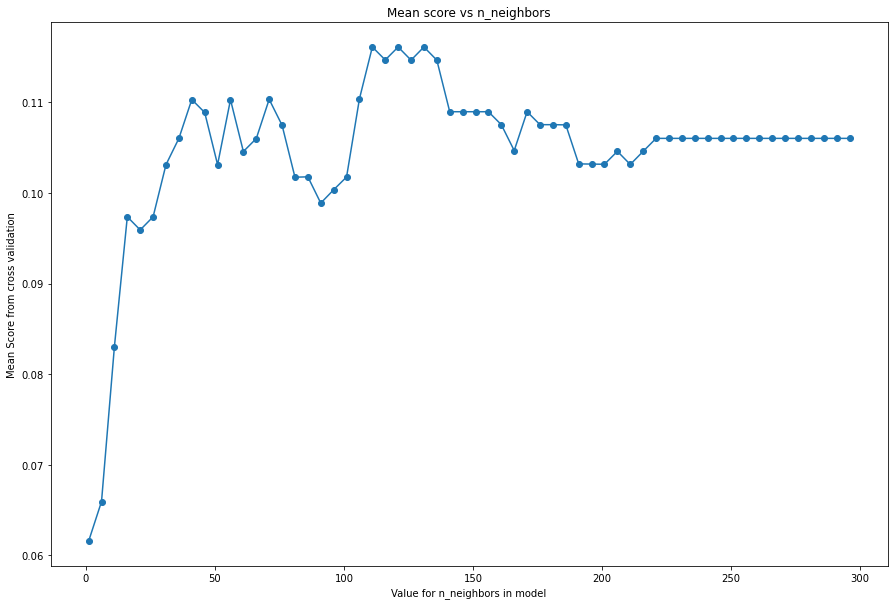

In [26]:
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier()
test_k = range(1,300+1,5)
params=[{
    'n_neighbors': test_k,
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()

fig, ax = plt.subplots()
ax.plot(test_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()

From the graph it seems like the ideal number of neighbors is in the range between 25 and 75. We can do a grid search of all values in that range to better visualize the space.

/home/arjun/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
<ipython-input-27-acdff45cd34f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


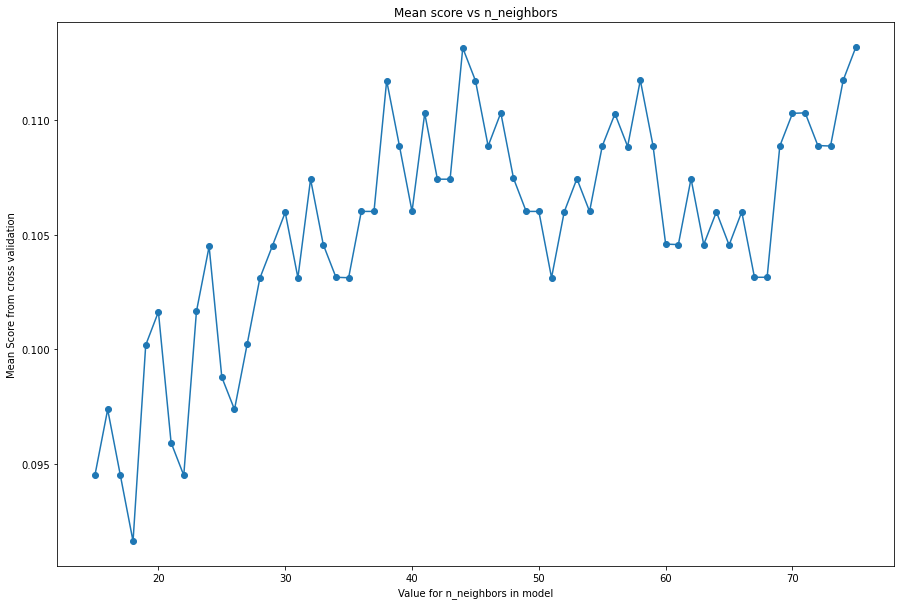

In [27]:
knn_model = KNeighborsClassifier()
test_k = range(15,75+1)
params=[{
    'n_neighbors': test_k,
    # 'weights': ['uniform', 'distance']
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()
tested_k = gs_knn.cv_results_['param_n_neighbors'].tolist()

fig, ax = plt.subplots()
ax.plot(tested_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()


In [28]:
max_score = max(result_k)
index_of_max = result_k.index(max_score)
optimal_k_val = tested_k[index_of_max]
optimal_k_val

75

There seems to be a peak in the data around $k = 52$ so that will be the value for k we will use in the final model.

With these hyper parameters set, we can evaulate our model's performance on the test set.

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k_val)
knn_trained = knn_model.fit(x_train, y_train)
knn_model.score(x_test,y_test)

0.0944206008583691

This is a suprisingly high amount of accuracy. I believe this is actually a result of candidates having similar spending patterns over time, and since a canditate is likely to serve multiple terms for their state it makes sense that we can can predict state from spending patterns. To test this theory, I will see if we can predict a candidate based on their spending.

### K-nn - Candidate

In [30]:
bio_count = {}
for bio_id in spending_member_info["BIOGUIDE_ID"].unique():
    bio_count[bio_id] = sum(sum([spending_member_info["BIOGUIDE_ID"] == bio_id]))
bio_count

{'A000014': 5,
 'A000022': 15,
 'A000055': 42,
 'A000364': 6,
 'A000358': 13,
 'A000361': 18,
 'A000362': 14,
 'A000210': 21,
 'A000363': 6,
 'A000365': 16,
 'B001234': 14,
 'B001256': 24,
 'B000013': 25,
 'B001229': 7,
 'B001230': 14,
 'B001239': 6,
 'B001252': 22,
 'B000208': 14,
 'B000213': 35,
 'B001253': 9,
 'B000287': 31,
 'B001231': 16,
 'B000410': 16,
 'B000420': 8,
 'B001232': 12,
 'B000461': 15,
 'B001257': 42,
 'B001250': 42,
 'B000490': 42,
 'B001242': 23,
 'B001243': 36,
 'B000574': 42,
 'B000575': 5,
 'B001263': 9,
 'B000589': 25,
 'B001244': 20,
 'B001228': 15,
 'B001236': 8,
 'B001245': 39,
 'B001254': 15,
 'B000652': 16,
 'B000657': 7,
 'B001255': 28,
 'B000716': 5,
 'B000755': 42,
 'B001227': 36,
 'B001259': 22,
 'B001264': 6,
 'B001262': 22,
 'B001247': 6,
 'B000911': 29,
 'B001235': 5,
 'B001260': 42,
 'B001248': 42,
 'B001149': 16,
 'B001251': 42,
 'B001203': 7,
 'C000059': 42,
 'C000071': 23,
 'C001064': 21,
 'C001046': 24,
 'C001079': 7,
 'C001047': 23,
 'C001036

In [31]:
spending_member_info_candidates_arr = []
for bio_id in spending_member_info["BIOGUIDE_ID"].unique():
    count = sum(sum([spending_member_info["BIOGUIDE_ID"] == bio_id]))
    if count > 20:
        spending_member_info_candidates_arr.append(spending_member_info[spending_member_info["BIOGUIDE_ID"] == bio_id])
spending_member_info_candidates = pd.concat(spending_member_info_candidates_arr)
len(spending_member_info_candidates["BIOGUIDE_ID"].unique())

463

In [32]:
x_train, x_test, y_train, y_test = train_test_split(spending_member_info_candidates[categories],spending_member_info_candidates["BIOGUIDE_ID"])
knn_model = KNeighborsClassifier()
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

0.04206760113677807

In [33]:
knn_model = KNeighborsClassifier(weights='distance')
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

0.05351768130302843

<ipython-input-34-7f69219a2088>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


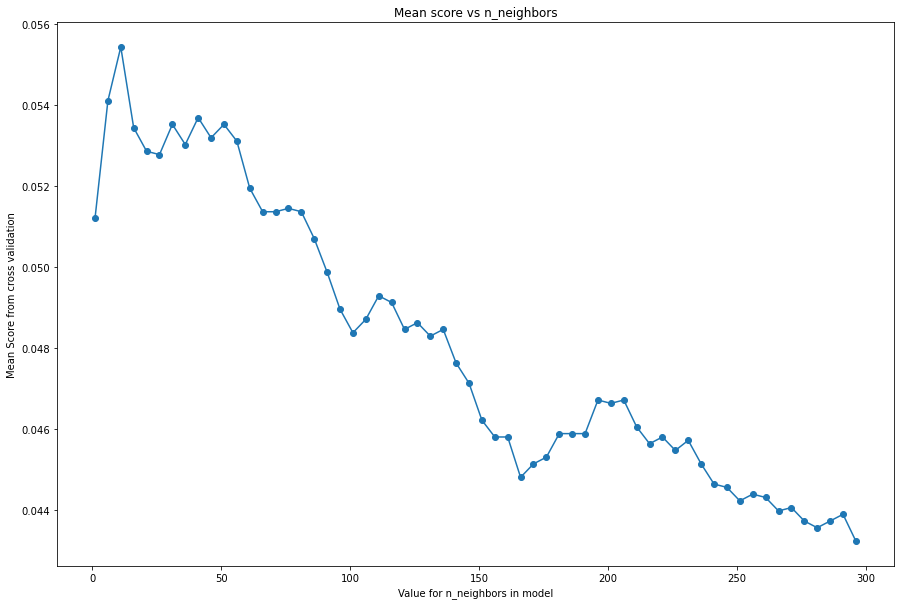

In [34]:
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier(weights='distance')
test_k = range(1,300+1,5)
params=[{
    'n_neighbors': test_k,
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()

fig, ax = plt.subplots()
ax.plot(test_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()

<ipython-input-35-540ada2706f5>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


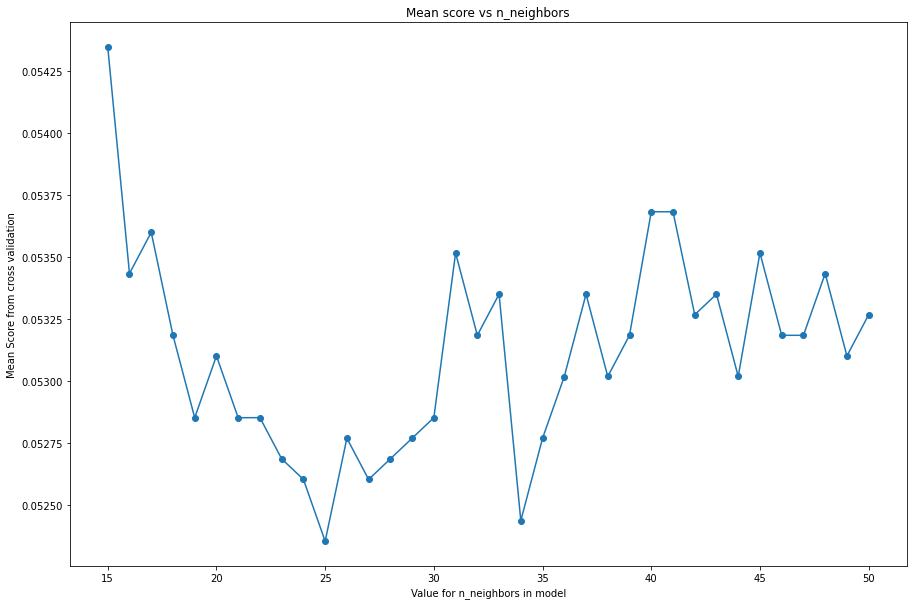

In [35]:
knn_model = KNeighborsClassifier(weights='distance')
test_k = range(15,50+1)
params=[{
    'n_neighbors': test_k,
    # 'weights': ['uniform', 'distance']
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()
tested_k = gs_knn.cv_results_['param_n_neighbors'].tolist()

fig, ax = plt.subplots()
ax.plot(tested_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()


In [36]:
max_score = max(result_k)
index_of_max = result_k.index(max_score)
optimal_k_val = tested_k[index_of_max]
optimal_k_val

15

In [37]:
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=optimal_k_val)
knn_trained = knn_model.fit(x_train, y_train)
knn_model.score(x_test,y_test)

0.06296665007466401

Indicitive of clustering based on candidate expenditure

I should try to remake the first 2 models but with only 1 data point for each candidate

# Part 3
## Cohorts of House members and personnel spending

For this part of the project, let's consider each freshman class of members of the House. To do this, we'll have to add in data from the elections dataframe as well. Note that we are using the date of each member's last election to the house and subtracting the number of terms they have served (per the data obtained from theunitedstates.io), since we are ignoring special elections (instead, we consider specially elected members as members of the previous cohort). 

In [38]:
import re
candidate_election_res = []
spending_election_df = spending_member_info_2_party.copy()
for index, row in spending_election_df.iterrows():
    candidate_res = (election_data[election_data['candidate'].str.contains(row['LASTNAME'], flags=re.IGNORECASE) & election_data['state'].str.contains(row['STATE'], flags=re.IGNORECASE)])
    if not candidate_res.empty:
        spending_election_df.loc[index, 'FIRST_ELECTED'] = candidate_res['year'].max() - int((row['TERMS'] - 1) * 2)

spending_election_df.dropna(subset=['FIRST_ELECTED'], inplace=True)

spending_election_df = spending_election_df[spending_election_df['FIRST_ELECTED'] >= 2010]
spending_election_df

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,TERMS,LASTNAME,FIRSTNAME,PARTY,STATE,FIRST_ELECTED
3,A000148,159.340000,450340.613333,10595.273333,0.000000,6249.540000,14976.660000,16235.866667,549740.266667,0.0,0.000000,0.000000,72318.253333,0.0,1.0,Auchincloss,Jake,Democratic,Massachusetts,2020.0
9,A000364,21911.470000,104002.581667,4466.935000,13644.785000,24247.825000,8708.440000,2729.533333,2411.126667,0.0,0.000000,0.000000,0.000000,0.0,1.0,Adler,John H.,Democratic,New Jersey,2012.0
11,A000366,16253.856364,147577.518182,4433.100909,11251.666364,21953.159091,10552.740909,5559.957273,3226.480000,0.0,0.000000,0.000000,0.000000,0.0,1.0,Adams,Sandy,Republican,Florida,2010.0
12,A000369,3111.872162,336959.389730,25698.931081,15600.166486,4930.340811,17505.267297,25934.110000,258788.621081,0.0,0.000000,781.893243,27545.353243,0.0,6.0,Amodei,Mark E.,Republican,Nevada,2010.0
13,A000370,9366.476250,431949.106250,19416.565833,7960.553750,14219.707083,14139.223333,24871.065417,456039.149167,0.0,0.000000,1210.616667,35531.781667,0.0,5.0,Adams,Alma S.,Democratic,North Carolina,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Y000063,17168.404000,206607.326571,14897.210571,18849.428857,25842.045714,11268.846286,5939.567429,91697.753429,0.0,0.000000,457.405429,7176.635143,0.0,4.0,Yoder,Kevin,Republican,Kansas,2012.0
927,Y000065,4120.238438,300707.860938,17538.361250,8825.123750,7192.835938,14217.881875,12983.630000,244929.378750,0.0,0.000000,484.918125,19558.886562,0.0,4.0,Yoho,Ted S.,Republican,Florida,2012.0
928,Y000066,11272.579444,236393.313333,16917.312222,10016.435556,8820.207778,12847.712222,12529.895556,175452.861667,0.0,0.388889,947.271667,17889.126111,0.0,2.0,Young,David,Republican,Iowa,2018.0
929,Z000017,23774.776250,428209.460000,15033.166667,7506.778333,21338.715000,22485.333750,14348.271250,453912.799583,0.0,106.994583,1232.522500,41940.898333,0.0,4.0,Zeldin,Lee M.,Republican,New York,2014.0


Here we have the spending dataframe from before, but now with the election data added. The "FIRST_ELECTED" column contains the election in which each member of the House was first elected. Since we are only concerned with evaluating the spending patterns of new cohorts of members of Congress, we need to have spending data for their entire congressional tenure - meaning that we need to drop any rows where "FIRST_ELECTED" is NaN (since these people were elected before 2010 and not subsequently re-elected), and any members whose first term started before 2010. 

As an example of this, we can generate violin plots of each cohort's spending on different categories. For example, we'll plot personnel compensation and travel. 

Text(0.5, 1.0, 'Cohorts of freshmen members of congress and their spending on personnel compensation')

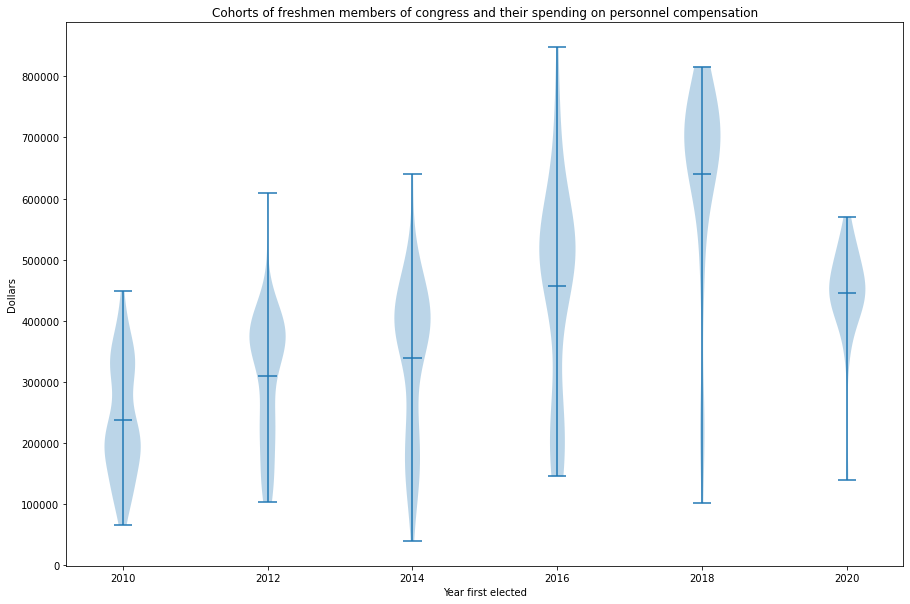

In [39]:
fig, ax = plt.subplots()
spending_cohort = []
for year in spending_election_df.FIRST_ELECTED.unique():
    spending_cohort.append(spending_election_df[spending_election_df.FIRST_ELECTED.eq(year)]['PERSONNEL COMPENSATION'])

ax.violinplot(spending_cohort, spending_election_df['FIRST_ELECTED'].unique(), showmeans=True)
ax.set_xlabel("Year first elected")
ax.set_ylabel("Dollars")
ax.set_title("Cohorts of freshmen members of congress and their spending on personnel compensation")

Text(0.5, 1.0, 'Cohorts of freshmen members of congress and their spending on travel')

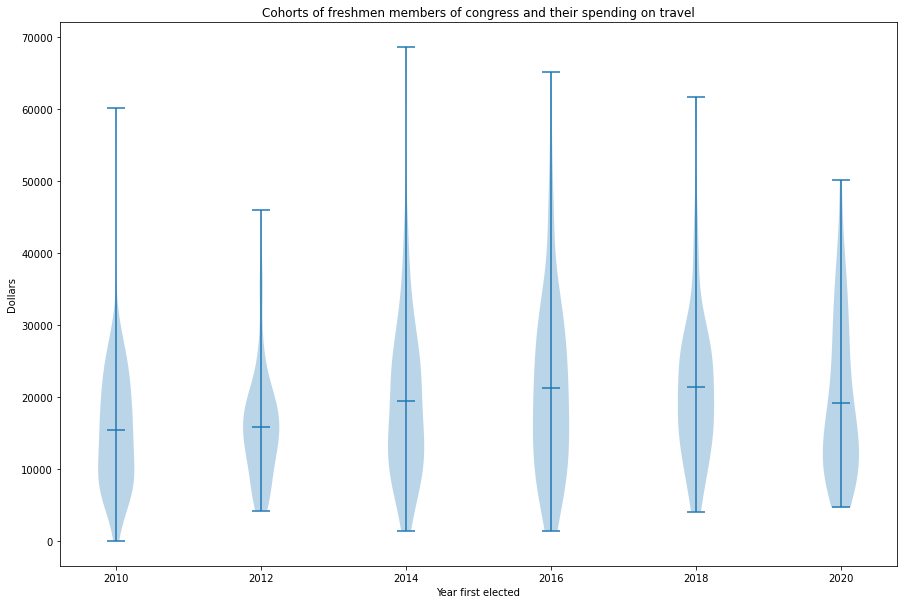

In [40]:
fig, ax = plt.subplots()
spending_cohort = []
for year in spending_election_df.FIRST_ELECTED.unique():
    spending_cohort.append(spending_election_df[spending_election_df.FIRST_ELECTED.eq(year)]['TRAVEL'])

ax.violinplot(spending_cohort, spending_election_df['FIRST_ELECTED'].unique(), showmeans=True)
ax.set_xlabel("Year first elected")
ax.set_ylabel("Dollars")
ax.set_title("Cohorts of freshmen members of congress and their spending on travel")

We can see that personnel compensation was much higher for members of congress initially elected in 2018. From here, we can suggest our null hypothesis (the default condition): that there is no correlation between the year a member of the House was initially elected and the amount they paid their staff. 

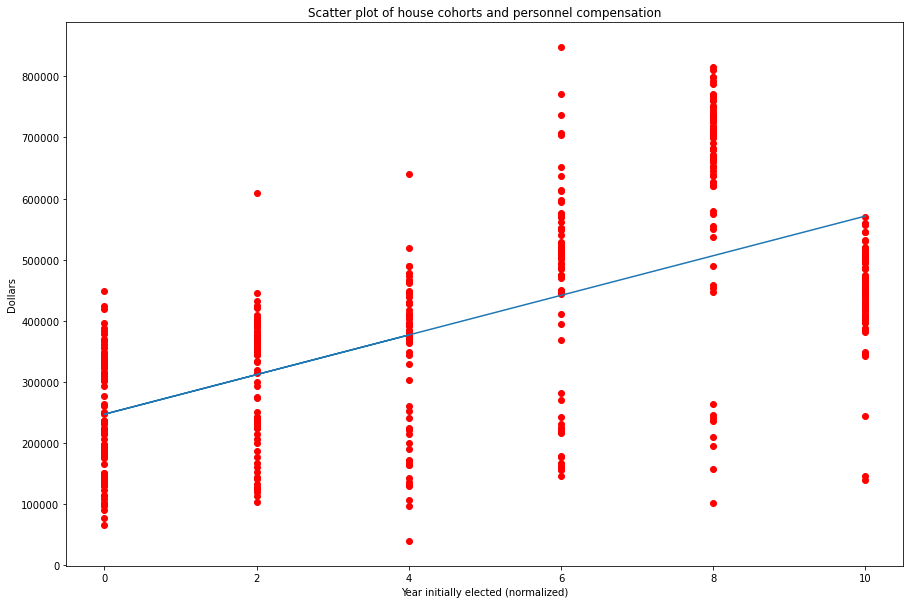

In [43]:
spending_election_df['NORMALIZED_COHORT'] = spending_election_df['FIRST_ELECTED'] - 2010
plt.plot(spending_election_df['NORMALIZED_COHORT'], spending_election_df['PERSONNEL COMPENSATION'], 'ro')
plt.title("Scatter plot of house cohorts and personnel compensation")
plt.xlabel("Year initially elected (normalized)")
plt.ylabel("Dollars")
(m, b) = np.polyfit(spending_election_df['NORMALIZED_COHORT'].values, spending_election_df['PERSONNEL COMPENSATION'].values, 1)
plt.plot(spending_election_df['NORMALIZED_COHORT'].values, b + m * spending_election_df['NORMALIZED_COHORT'].values, '-')
plt.show()

In [47]:
import statsmodels.formula.api as smf
spending_election_df.rename(columns={ 'PERSONNEL COMPENSATION': 'PERSONNEL_COMPENSATION'}, inplace=True)
new_model = smf.ols(formula='PERSONNEL_COMPENSATION ~ NORMALIZED_COHORT', data=spending_election_df).fit()
summary = new_model.summary()

results_as_html = summary.tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,247300.0,11100.000,22.227,0.0,225000.0,269000.0
NORMALIZED_COHORT,32400.0,1892.941,17.119,0.0,28700.0,36100.0


After running our P-test, we can see that there is a statistical correlation between the cohort (in this case its normalized form), and the amount that each member of the house spent on paying their legislative staff. We can therefore reject the null hypothesis and conclude that there is a statistically significant correlation between freshman class and the amount spent on each member's office staff. 